<center>
    <h1>University of Canberra</h1>
    <h3>11482 - Pattern Recognition and Machine Learning</h3>
    <h3>Tutorial Class Thursday 0930 (Semester 2 / 2024)</h3>
    <h2>Unit Project Stage 2</h2>
    <h2>Group 101 (Individual)</h2>
    <h2>James McGuinness</h2>
    ______________________________________________________________________________________________________________________________________________________
</center>


# Executive summary
1. Define the problem again - what is the goal of the project?
2. Keep asking the question - why am I using PRML for this? Is this problem still suitable for PR?
3. This is more of an exploration task for me, a learning process - I want to see if this is something I would like pursue in further studies
4. Quick detail about myself, being mature age and maybe two decades in the industry
5. Probably spent a bit more time than expected on the EDA, I think understanding the data is more important at the moment.
6. I did use ChatGPT a fair bit
7. Identify features in the dataset and develop a model that is able to accurately predict on new data.
- I did discover that the 30 features are actually made up of three sets of the same ten measurements.
- Also that each of the 569 sample, are actually individual cells - each sample is the measurements of a single cell.
- Eg: a set of Mean measurement, a set of Standard Errror measurements and a set of worst measurements for a single cell.
- I am making a lot of data frames lol

# Part A

### Prerequisites and Libraries to import

In [1]:
# Pre-reqs and libraries to import
#import sys
#sys.path.append('C:\\Users\\James\\Desktop\\RoboticsJourney\\Self_Study\\1.PatternReg.ML\\introduction_to_ml_with_python')
#import mglearn
#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import pandas as pd
from pandas import set_option
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

## Preprocessing (Criteria B1)
Data set selection and description of dataset and features.  
Explain if any pre-processing would be required for the chosen dataset.  
Explain how the features would be used in model development. (Use any feedback from Assn1).  
(*10 pts*)

In [ ]:
print(cancer.DESCR)

In [12]:
print("Dataset summary")
print(f"- Shape: {cancer.data.shape}")
print(f"- Types: {cancer.data.dtype}")
print(f"- Samples: {len(cancer.data)}")
print(f"- Features: {len(cancer.feature_names)}")
print(f"- Features names: {cancer.feature_names[:4]}")
print(f"- Data values of a sample: {cancer.data[0, :4]}")
print(f"- Target classes: {cancer.target[0:20]}")
print(f"- Target class names: {cancer.target_names}")
print("\nClass Distribution")
print("- Counts per Class:{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print(f"- Count of 0's is {np.count_nonzero(cancer.target == 0)} which represents Malignant")
print(f"- Count of 1's is {np.count_nonzero(cancer.target == 1)} which represents Benign")

Dataset summary
- Shape: (569, 30)
- Types: float64
- Samples: 569
- Features: 30
- Features names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area']
- Data values of a sample: [  17.99   10.38  122.8  1001.  ]
- Target classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
- Target class names: ['malignant' 'benign']

Class Distribution
- Counts per Class:{'malignant': 212, 'benign': 357}
- Count of 0's is 212 which represents Malignant
- Count of 1's is 357 which represents Benign


### Statistics

In [13]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class_label'] = cancer.target
set_option('display.width', 100)
set_option('display.precision', 3)
df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class_label
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,0.063,...,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084,0.627
std,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,0.007,...,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018,0.484
min,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,...,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.157,0.055,0.000
25%,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,0.058,...,21.080,84.110,515.300,0.117,0.147,0.115,0.065,0.250,0.071,0.000
50%,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,0.062,...,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080,1.000
75%,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,0.066,...,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092,1.000
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.207,1.000


### Pandas DF display of a single sample

In [192]:
features = cancer.feature_names
first_row_data = cancer.data[1]
df1 = pd.DataFrame({
    'Mean': features[:10],
    'Values': first_row_data[:10]
})
df2 = pd.DataFrame({
    'Standard Error': features[10:20],
    'Values': first_row_data[10:20]
})
df3 = pd.DataFrame({
    'Worst': features[20:30],
    'Values': first_row_data[20:30]
})
df_combined = pd.concat([df1, df2, df3], axis=1)
df_combined

,Mean,Values,Standard Error,Values,Worst,Values
0,mean radius,20.570,radius error,0.543,worst radius,24.990
1,mean texture,17.770,texture error,0.734,worst texture,23.410
2,mean perimeter,132.900,perimeter error,3.398,worst perimeter,158.800
3,mean area,1326.000,area error,74.080,worst area,1956.000
4,mean smoothness,0.085,smoothness error,0.005,worst smoothness,0.124
5,mean compactness,0.079,compactness error,0.013,worst compactness,0.187
6,mean concavity,0.087,concavity error,0.019,worst concavity,0.242
7,mean concave points,0.070,concave points error,0.013,worst concave points,0.186
8,mean symmetry,0.181,symmetry error,0.014,worst symmetry,0.275
9,mean fractal dimension,0.057,fractal dimension error,0.004,worst fractal dimension,0.089


### Pandas DF Display of Radius feature

In [15]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
labels_df = pd.DataFrame(cancer.target, columns=['label'])
labels_df['label'] = labels_df['label'].map({0: '0 - Malignant', 1: '1 - Benign'})
selected_columns = cancer_df[['mean radius', 'radius error', 'worst radius']]
result_df = pd.concat([selected_columns, labels_df], axis=1)
result_df.head(10)


,mean radius,radius error,worst radius,label
0,17.99,1.095,25.38,0 - Malignant
1,20.57,0.543,24.99,0 - Malignant
2,19.69,0.746,23.57,0 - Malignant
3,11.42,0.496,14.91,0 - Malignant
4,20.29,0.757,22.54,0 - Malignant
5,12.45,0.335,15.47,0 - Malignant
6,18.25,0.447,22.88,0 - Malignant
7,13.71,0.584,17.06,0 - Malignant
8,13.00,0.306,15.49,0 - Malignant
9,12.46,0.298,15.09,0 - Malignant


## Visualisation (Criteria B2)
Dataset analysis, visualisation, feature correlation, insights extracted from data visualisation to be used for guiding model development.  
(*10 pts*)

- Eg: Bar graphs and histograms
- Eg: Boxplots
- Eg: Scatterplots - two variables - x input / y output - might be hard to understand re: 30 features times 14 = 420 scatter plots ref page 142
- Can you get one of those 4x4 scatter plots working for the breast scan dataset
- HeatMap / correlation matrix
- And what are the data types of the attributes?
- Can I get some statistics around the breast set?

### Feature Correlation

In [ ]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class_label'] = cancer.target
df.corr()

In [44]:
mean_attributes = df.iloc[:, :10].copy() 
mean_attributes.loc[:, 'class_label'] = df['class_label']
mean_attributes.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,class_label
mean radius,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,-0.312,-0.730
mean texture,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,-0.076,-0.415
mean perimeter,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,-0.261,-0.743
mean area,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,-0.283,-0.709
mean smoothness,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,0.585,-0.359
mean compactness,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,0.565,-0.597
mean concavity,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,0.337,-0.696
mean concave points,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,0.167,-0.777
mean symmetry,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,0.480,-0.330
mean fractal dimension,-0.312,-0.076,-0.261,-0.283,0.585,0.565,0.337,0.167,0.480,1.000,0.013


- I think mean concave points has a high correlation to class being 0?

In [45]:
se_attributes = df.iloc[:, 10:20].copy()
se_attributes.loc[:, 'class_label'] = df['class_label']
se_attributes.corr()

,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,class_label
radius error,1.000,0.213,0.973,0.952,0.165,0.356,0.332,0.513,0.241,0.228,-0.567
texture error,0.213,1.000,0.223,0.112,0.397,0.232,0.195,0.230,0.412,0.280,0.008
perimeter error,0.973,0.223,1.000,0.938,0.151,0.416,0.362,0.556,0.266,0.244,-0.556
area error,0.952,0.112,0.938,1.000,0.075,0.285,0.271,0.416,0.134,0.127,-0.548
smoothness error,0.165,0.397,0.151,0.075,1.000,0.337,0.269,0.328,0.414,0.427,0.067
compactness error,0.356,0.232,0.416,0.285,0.337,1.000,0.801,0.744,0.395,0.803,-0.293
concavity error,0.332,0.195,0.362,0.271,0.269,0.801,1.000,0.772,0.309,0.727,-0.254
concave points error,0.513,0.230,0.556,0.416,0.328,0.744,0.772,1.000,0.313,0.611,-0.408
symmetry error,0.241,0.412,0.266,0.134,0.414,0.395,0.309,0.313,1.000,0.369,0.007
fractal dimension error,0.228,0.280,0.244,0.127,0.427,0.803,0.727,0.611,0.369,1.000,-0.078


In [50]:
worst_attributes = df.iloc[:, 20:30].copy()
worst_attributes.loc[:, 'class_label'] = df['class_label']
worst_attributes.corr()

,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class_label
worst radius,1.000,0.360,0.994,0.984,0.217,0.476,0.574,0.787,0.244,0.093,-0.776
worst texture,0.360,1.000,0.365,0.346,0.225,0.361,0.368,0.360,0.233,0.219,-0.457
worst perimeter,0.994,0.365,1.000,0.978,0.237,0.529,0.618,0.816,0.269,0.139,-0.783
worst area,0.984,0.346,0.978,1.000,0.209,0.438,0.543,0.747,0.209,0.080,-0.734
worst smoothness,0.217,0.225,0.237,0.209,1.000,0.568,0.519,0.548,0.494,0.618,-0.421
worst compactness,0.476,0.361,0.529,0.438,0.568,1.000,0.892,0.801,0.614,0.810,-0.591
worst concavity,0.574,0.368,0.618,0.543,0.519,0.892,1.000,0.855,0.533,0.687,-0.660
worst concave points,0.787,0.360,0.816,0.747,0.548,0.801,0.855,1.000,0.503,0.511,-0.794
worst symmetry,0.244,0.233,0.269,0.209,0.494,0.614,0.533,0.503,1.000,0.538,-0.416
worst fractal dimension,0.093,0.219,0.139,0.080,0.618,0.810,0.687,0.511,0.538,1.000,-0.324


### Skew
- From viewing the skew of data, can I make a decision if I need to scale or transform the data?

In [34]:
df.iloc[:, :10].skew()

mean radius               0.942
mean texture              0.650
mean perimeter            0.991
mean area                 1.646
mean smoothness           0.456
mean compactness          1.190
mean concavity            1.401
mean concave points       1.171
mean symmetry             0.726
mean fractal dimension    1.304
dtype: float64

In [35]:
df.iloc[:, 10:20].skew()

radius error               3.089
texture error              1.646
perimeter error            3.444
area error                 5.447
smoothness error           2.314
compactness error          1.902
concavity error            5.110
concave points error       1.445
symmetry error             2.195
fractal dimension error    3.924
dtype: float64

In [36]:
df.iloc[:, 20:30].skew()

worst radius               1.103
worst texture              0.498
worst perimeter            1.128
worst area                 1.859
worst smoothness           0.415
worst compactness          1.474
worst concavity            1.150
worst concave points       0.493
worst symmetry             1.434
worst fractal dimension    1.663
dtype: float64

### Histograms
- To determine outliers, Gaussian, skewed or exponential distribution

In [ ]:
plt.figure(figsize=(12, 10))
df.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(16, 12))
df.hist(bins=20, figsize=(16, 12), layout=(6, 6), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


### Unsupervised Learning and Preprocessing - chapt 3 - page 142 - O'Reilly Introduction to Machine Learning with Python

In [ ]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='red', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='blue', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

### Pairplot - mean values

In [ ]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df['target'] = df['target'].map({0: 'Malignant', 1: 'Benign'})
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness','target']
sns.pairplot(df[selected_features], hue='target', palette='coolwarm')
plt.show()

In [ ]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df['target'] = df['target'].map({0: 'Malignant', 1: 'Benign'})
selected_features = ['mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension','target']
sns.pairplot(df[selected_features], hue='target', palette='coolwarm')
plt.show()

### Pairplot - worst values

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

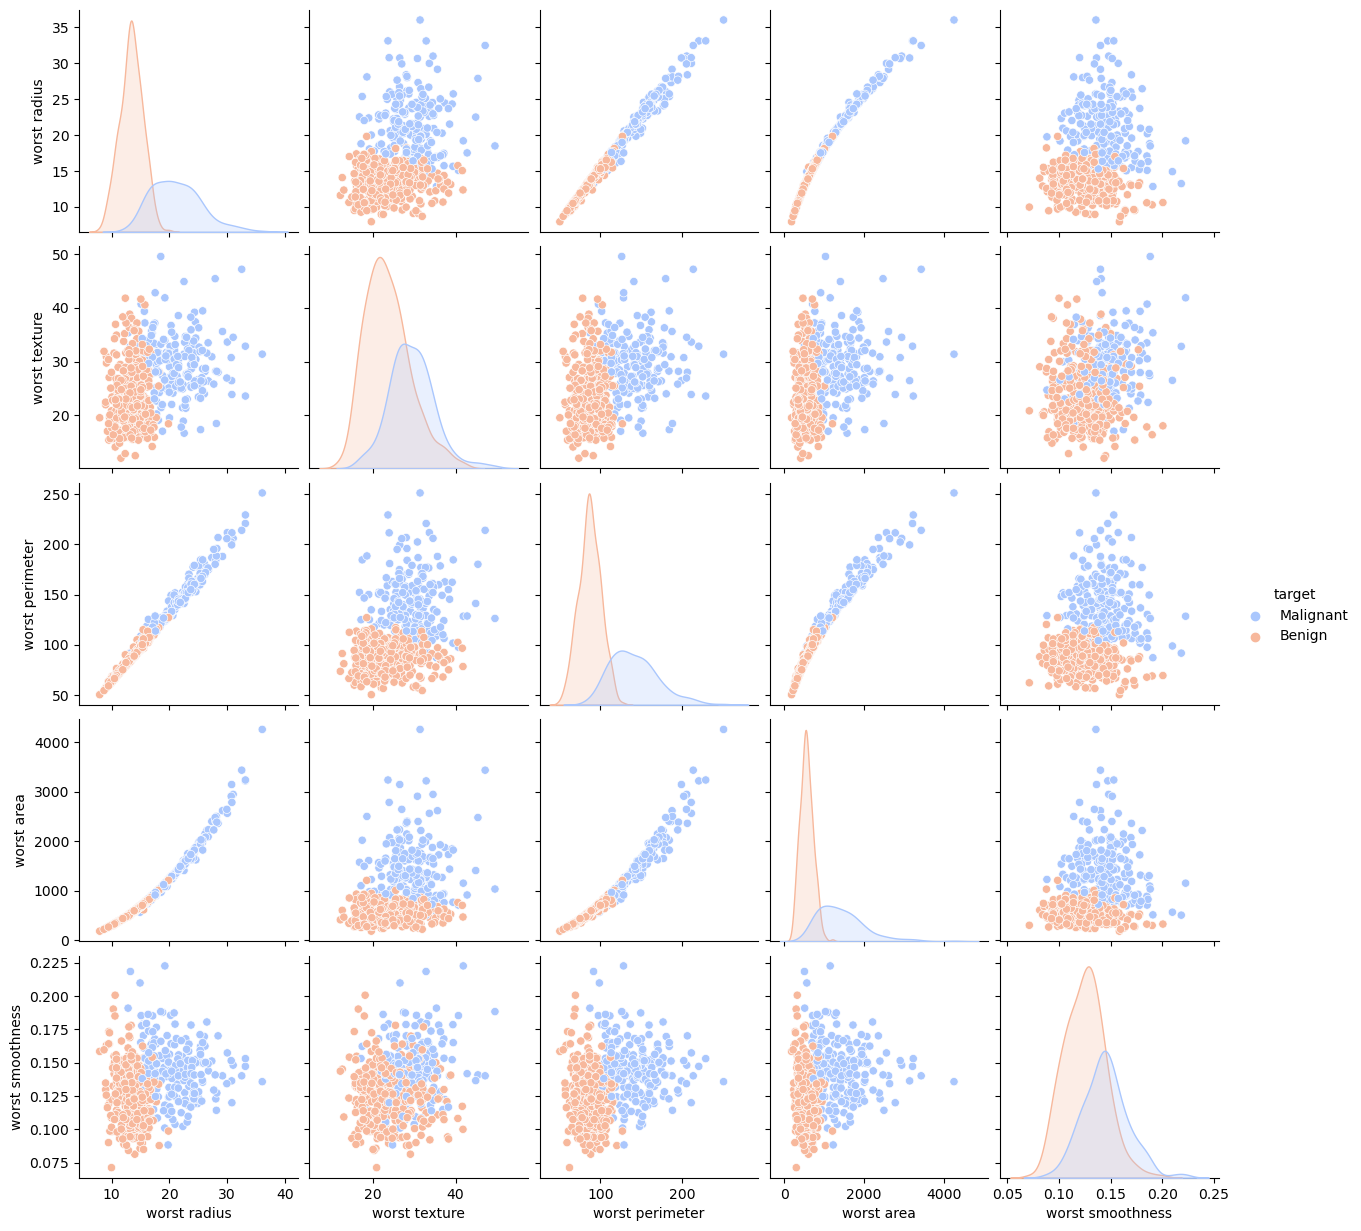

In [79]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df['target'] = df['target'].map({0: 'Malignant', 1: 'Benign'})
selected_features = ['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness','target']
sns.pairplot(df[selected_features], hue='target', palette='coolwarm')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

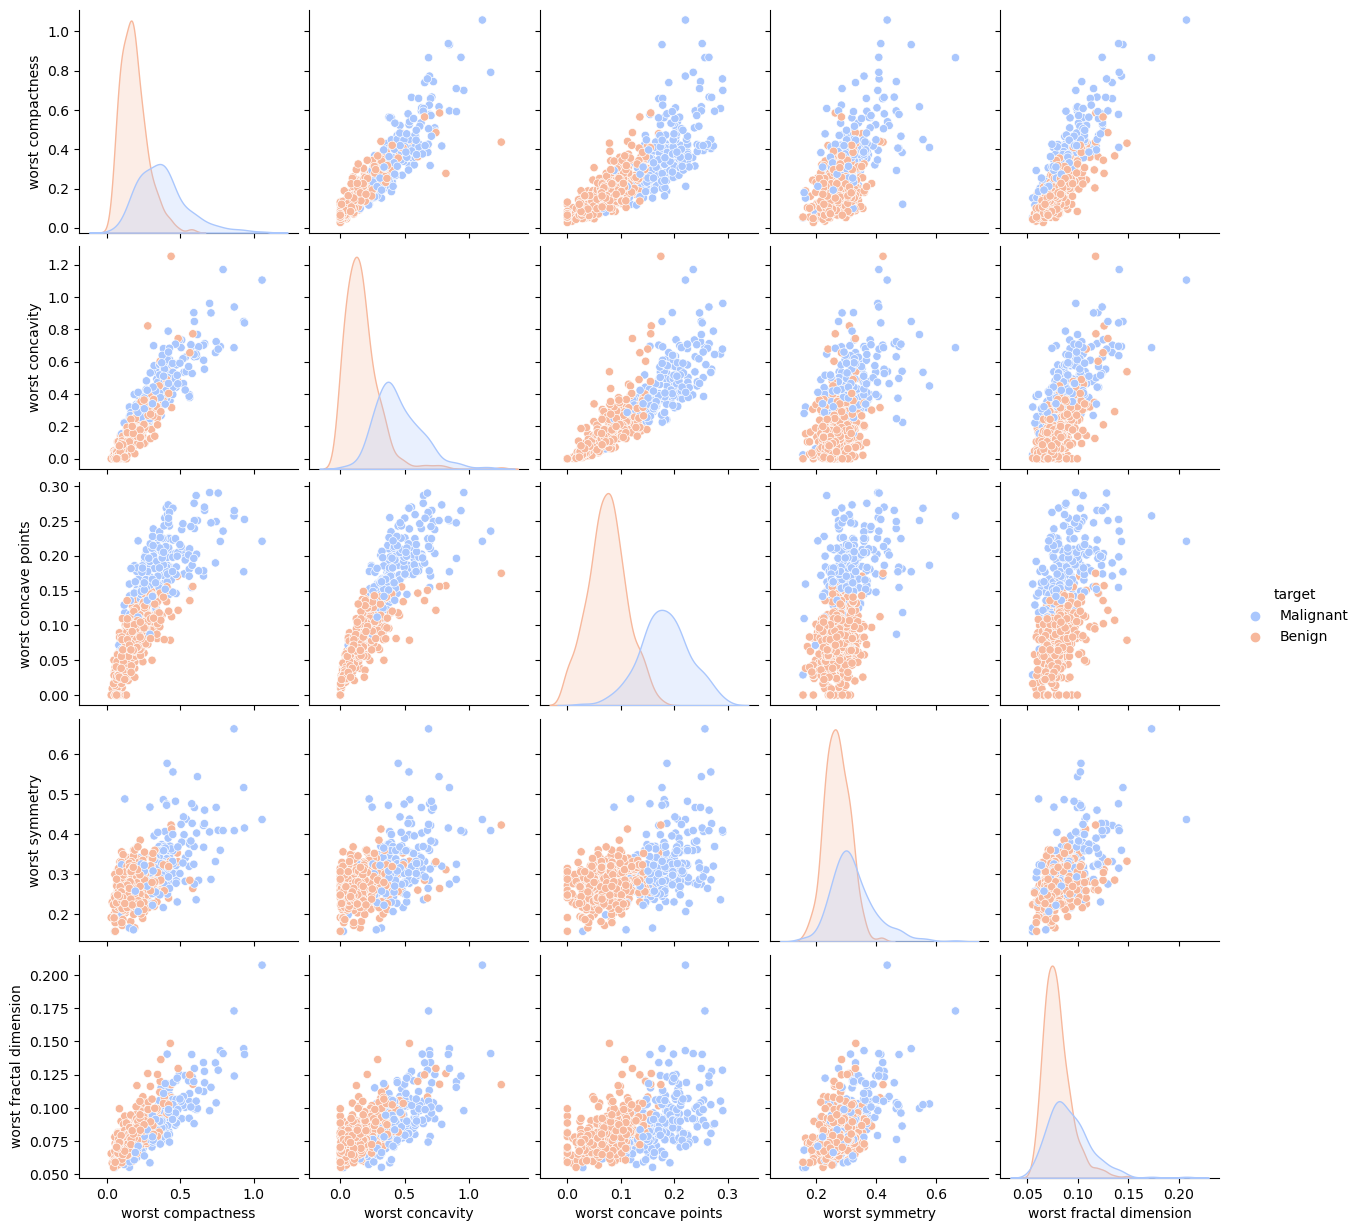

In [78]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df['target'] = df['target'].map({0: 'Malignant', 1: 'Benign'})
selected_features = ['worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension','target']
sns.pairplot(df[selected_features], hue='target', palette='coolwarm')
plt.show()

### HeatMap Correlation Matrix

In [ ]:
sns.heatmap(df.corr(), annot=True) 

## Data Preparation (Criteria B3) 
*(Scaling / PCA / preprocessing / cleaning)*  
Data preparation including transforms, scaling, re-shaping and any feature selection to reduce dimensionality.  
Summary of cleaned/pre-processed data ready for use for PRML model development.  
(*6 pts*)

- Prepare data
- Use data transforms / scaling / re-shaping
- Feature selection in order to reduce dimensionality 
- PCA
- Summarize data 

In [1]:
# Could do regularization here - ref page 61 with graph ic features and C parameter - L1 regularization penalty
# MinMaxScaler - page 134
# PCA on page 140 - with visualisation of all properties in a histogram on page 143
# PCA visual on page 145 - showing malignant and benign

## Model Selection (Criteria B4)
Selection of 3-4 PRML algorithms for the project that are most appropriate.  
How have you determined these to be most applicable?  
Explain your reasoning. (Use any feedback from Assignment 1).  
(*6 pts*)

- Decide which algorithms to use
- Explain my reasoning
- Select four algorithms to spot-check 
- Determine the best based on accuracy evaluations

In [47]:
# Decision tree ref page 75 
# I think SVM on page 100?
# Can I do some Polynomial Linear Regression here?
# Neural Networks on page 116 with heatmap

- Data cleaning? Missing values / outliers?
- Feature engineering
- Feature selection
- PCA and another thing called Recursive feature elimination 

In [1]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Define models to try
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC())
]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

In [ ]:
# Compare models using cross-validation
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")



In [12]:
# Example of hyperparameter tuning for the best model (let's say it's Random Forest)
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [13]:
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
print("Best parameters:", rf_grid.best_params_)
print("Best cross-validation score:", rf_grid.best_score_)

# Final model
best_model = rf_grid.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.9601094391244871


In [14]:
best_model

RandomForestClassifier(min_samples_split=5)

In [ ]:
# Example Code for accuracy_score, confusion_matrix, classification_report
# Train a kNN model and make predictions on the testing dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

In [17]:
# !! Check out
# W3_statements_for_Assignment.ipynb

## Accuracy Reports (Criteria B5)
Implement the selected algorithms and generate the accuracy report for spot-checking the algorithms.  
(*10 pts*)


6. **False Positive and False Negative**:
   - **False Positive**: Incorrectly predicts a positive outcome when the actual outcome is negative.
   - **False Negative**: Incorrectly predicts a negative outcome when the actual outcome is positive.
   - **Implications**: Varies based on the context, such as medical diagnoses or spam detection.

7. **Precision and Recall**:
   - **Precision**: Ratio of true positive predictions to the total positive predictions made. Indicates the accuracy of positive predictions.
   - **Recall**: Ratio of true positive predictions to the total actual positive cases. Measures the model's ability to identify positive cases correctly.
   - **Use**: Particularly useful in cases of class imbalance.

8. **F1 Score**:
   - **Definition**: The harmonic mean of precision and recall. Provides a balance between precision and recall, especially in imbalanced datasets.
   - **Formula**: $ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $

9. **Confusion Matrix and Correlation Matrix**:
   - **Confusion Matrix**: A table showing the performance of a classification model with counts of true positives, true negatives, false positives, and false negatives.
   - **Correlation Matrix**: A table displaying correlation coefficients between multiple variables, used to understand feature relationships.

10. **Classification Report**:
    - **Definition**: A summary of a classification model's performance, including precision, recall, F1-score, and support for each class.
    - **Purpose**: Provides a comprehensive view of model performance across different classes, accounting for true positives, false positives, and false negatives.


# References 
- https://www.saintjohnscancer.org/breast/breast-cancer/types-of-breast-cancer/

# Part B

1a. How are decision trees used for regression tasks different from those used for classification?  
*(5 pts)*

1b. How does a decision tree make predictions for new data points?  
(*5 pts*)

2a. What is the criterion being optimized by SVMs?  
(*5 pts*)

2b. How do SVMs handle the case of non-linearly separable data? What is the ‘kernel trick’, and why is it used in SVMs?  
(*5 pts*)

2c. How can SVMs be extended to handle multi-class classification problems?  
(*5 pts*)

3a. Dataset description – breast-cancer dataset (refer to the sklearn dataset on breast-cancer)  
(*5 pts*)

3b. What model parameters and hyperparameters are relevant to SVM-BC and used in the sklearn package SVM?  
How can they be tuned for optimisation?  
(*5 pts*)

3c. What are relevant kernel functions and how are they used in SVM learners?  
Which one have you selected for your implementation of SVM through sklearn?  
How have you decided the best kernel?
(*5 pts*)

3d. What do the parameters C, decision_function_shape=’ovr’, degree, gamma and kernel mean in the following SVM classifier call?  

SVC(C=1.0, cache_size=200, class_weight=None, coef0.0.0, decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

(*5 pts*)

3e. Implement the SVM-BC classifier for the breast-cancer dataset.  
Show the outcomes.  
(*8 pts*)

3f. Perform an accuracy analysis using a classification report for both the DecisionTree model and the SVM-BC model?  
Which model is better? Justify.  
(*5 pts*)

**End of document**